In [ ]:
#importing all the necessary packages 

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import io
import zipfile
import os

In [ ]:
#Start by connecting gdrive into the google colab

from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
#connecting to the local local drive and extracting all the files in the zip 

local_zip = '/content/gdrive/MyDrive/deeplearning_cps/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
#making base directory

base_dir = '/tmp/cats_and_dogs_filtered'

In [ ]:
#making two seperate 

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [ ]:
# Directory with our training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

In [ ]:
# Directory with the validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

In [ ]:
#printing out the cats and dogs

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.68.jpg', 'cat.690.jpg', 'cat.1622.jpg', 'cat.674.jpg', 'cat.1146.jpg', 'cat.908.jpg', 'cat.1721.jpg', 'cat.1608.jpg', 'cat.853.jpg', 'cat.1040.jpg']
['dog.12135.jpg', 'dog.12061.jpg', 'dog.11502.jpg', 'dog.11697.jpg', 'dog.10647.jpg', 'dog.12273.jpg', 'dog.10861.jpg', 'dog.12037.jpg', 'dog.10822.jpg', 'dog.11167.jpg']


In [ ]:
#checking out the number of training and testing data

print('total training cat images :', len(os.listdir( train_cats_dir ) ))
print('total training dog images :', len(os.listdir( train_dogs_dir ) ))
print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 2000
total training dog images : 2000
total validation cat images : 500
total validation dog images : 501


In [ ]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4
pic_index = 0 # Index for iterating over images

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index+=8
next_cat_pix = [os.path.join(train_cats_dir, fname) for fname in train_cat_fnames[ pic_index-8:pic_index]]

<Figure size 1152x1152 with 0 Axes>

In [ ]:
next_dog_pix = [os.path.join(train_dogs_dir, fname)
 for fname in train_dog_fnames[ pic_index-8:pic_index]
 ]

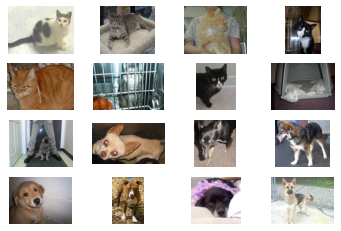

In [ ]:
for i, img_path in enumerate(next_cat_pix+next_dog_pix):
 # Set up subplot; subplot indices start at 1
 sp = plt.subplot(nrows, ncols, i + 1)
 sp.axis('Off') # Don't show axes (or gridlines)
 img = mpimg.imread(img_path)
 plt.imshow(img)
plt.show()

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([
 # Note the input shape is the desired size of the image 150x150 with 3 bytes color
 tf.keras.layers.Conv2D(16, (3,3), activation='ReLU', input_shape=(150, 150, 3)),
 tf.keras.layers.MaxPooling2D(2,2),
 tf.keras.layers.Conv2D(32, (3,3), activation='ReLU'),
 tf.keras.layers.MaxPooling2D(2,2),
 tf.keras.layers.Conv2D(64, (3,3), activation='ReLU'),
 tf.keras.layers.MaxPooling2D(2,2),
 #adding extra layer to the model
 tf.keras.layers.Conv2D(128, (3,3), activation='ReLU'),
 tf.keras.layers.MaxPooling2D(2,2),
 # Flatten the results to feed into a DNN
 tf.keras.layers.Flatten(),
 # 512 neuron hidden layer(given in pdf)
 #changing 512 neurons to 256 neurons and adding two more fully connected layers
 tf.keras.layers.Dense(256, activation='ReLU'),
 tf.keras.layers.Dense(128,activation='ReLU'),
 # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
 tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate= 0.0001),
 loss='binary_crossentropy',
 metrics = ['acc'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [ ]:
# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
 batch_size=20,
 class_mode='binary',
target_size=(150, 150))

Found 4000 images belonging to 2 classes.


In [ ]:
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator = test_datagen.flow_from_directory(validation_dir,
 batch_size=20,
 class_mode = 'binary',
 target_size = (150, 150))

Found 1001 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(train_generator,validation_data=validation_generator,steps_per_epoch=100,
 epochs=20,
 validation_steps=50,
 verbose=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/20
100/100 - 57s - loss: 0.6932 - acc: 0.5355 - val_loss: 0.6811 - val_acc: 0.6070 - 57s/epoch - 567ms/step
Epoch 2/20
100/100 - 55s - loss: 0.6733 - acc: 0.5785 - val_loss: 0.6534 - val_acc: 0.6180 - 55s/epoch - 547ms/step
Epoch 3/20
100/100 - 55s - loss: 0.6596 - acc: 0.6060 - val_loss: 0.6401 - val_acc: 0.6380 - 55s/epoch - 548ms/step
Epoch 4/20
100/100 - 54s - loss: 0.6387 - acc: 0.6285 - val_loss: 0.6153 - val_acc: 0.6700 - 54s/epoch - 544ms/step
Epoch 5/20
100/100 - 54s - loss: 0.6123 - acc: 0.6565 - val_loss: 0.5857 - val_acc: 0.6930 - 54s/epoch - 545ms/step
Epoch 6/20
100/100 - 54s - loss: 0.5914 - acc: 0.6835 - val_loss: 0.5899 - val_acc: 0.6680 - 54s/epoch - 544ms/step
Epoch 7/20
100/100 - 55s - loss: 0.5632 - acc: 0.7070 - val_loss: 0.5610 - val_acc: 0.7070 - 55s/epoch - 550ms/step
Epoch 8/20
100/100 - 55s - loss: 0.5446 - acc: 0.7195 - val_loss: 0.5597 - val_acc: 0.7000 - 55s/epoch - 550ms/step
Epoch 9/20
100/100 - 58s - loss: 0.5193 - acc: 0.7345 - val_loss: 0.5270

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
uploaded=files.upload()
for fn in uploaded.keys():
 # predicting images
 path='/content/' + fn
 img=image.load_img(path, target_size=(150, 150))

 x=image.img_to_array(img)
 x=np.expand_dims(x, axis=0)
 images = np.vstack([x])

 classes = model.predict(images, batch_size=10)

 print(classes[0])

 if classes[0]>0:
   print(fn + " is a dog")

 else:
   print(fn + " is a cat")

Saving 2.jpg to 2.jpg
[1.]
2.jpg is a dog


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


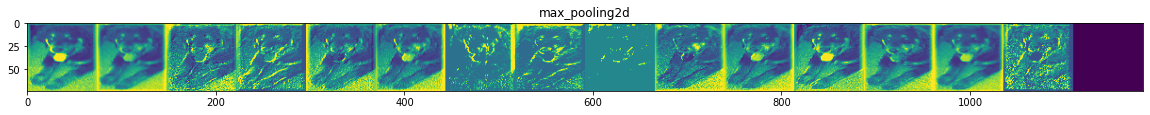

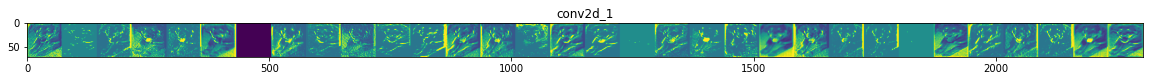

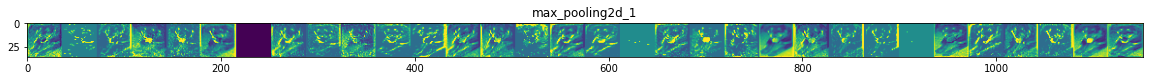

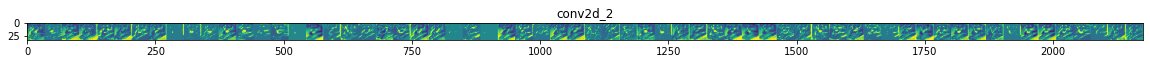

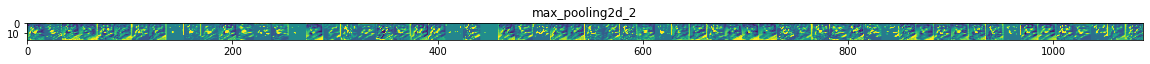

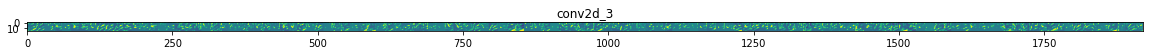

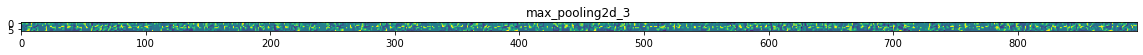

In [ ]:
#import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

Text(0.5, 1.0, 'Training and validation loss')

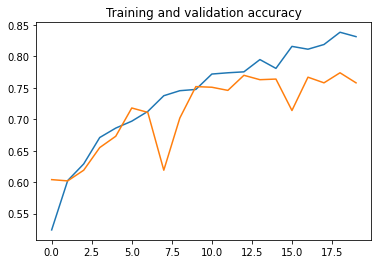

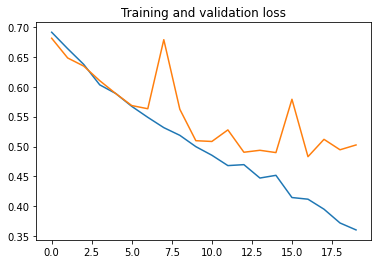

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc = history.history[ 'acc' ]
val_acc = history.history[ 'val_acc' ]
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs = range(len(acc)) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot ( epochs, acc )
plt.plot ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot ( epochs, loss )
plt.plot ( epochs, val_loss )
plt.title ('Training and validation loss' )

In [ ]:
import os, signal
os.kill( os.getpid() ,
 signal.SIGKILL
 )

In [ ]:
#steps taken to increase accuracy

"""

AT first with the given optmizers and all the other layers i got 75% accuracy with validation acuracy of 73%.
to increase the accuracy of my model i have added one hidden layer with 128 filters so it gets more capicity to learn features 
and i have added 2 more fully connected layers by removing 512 i have added 256 and 128 fc layers and then went to 1 layer.
and i have changed the learning rate so that i could take more steps. then accuracy increased from 76% to 83%

"""